In [ ]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')



# **Importing Data**

In [ ]:
from google.colab import files
files.upload()

Saving fraudTest.csv.zip to fraudTest.csv.zip
Saving fraudTrain.csv.zip to fraudTrain.csv.zip
Buffered data was truncated after reaching the output size limit.

In [8]:
!unzip fraudTrain.csv.zip

!unzip fraudTest.csv.zip

Archive:  fraudTrain.csv.zip
replace fraudTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  fraudTest.csv.zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Exploring Dataset

In [11]:
train_data = pd.read_csv('fraudTrain.csv')

test_data = pd.read_csv('fraudTest.csv')

print(train_data.shape)
print(test_data.shape)
train_data.head()

(1296675, 23)
(555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


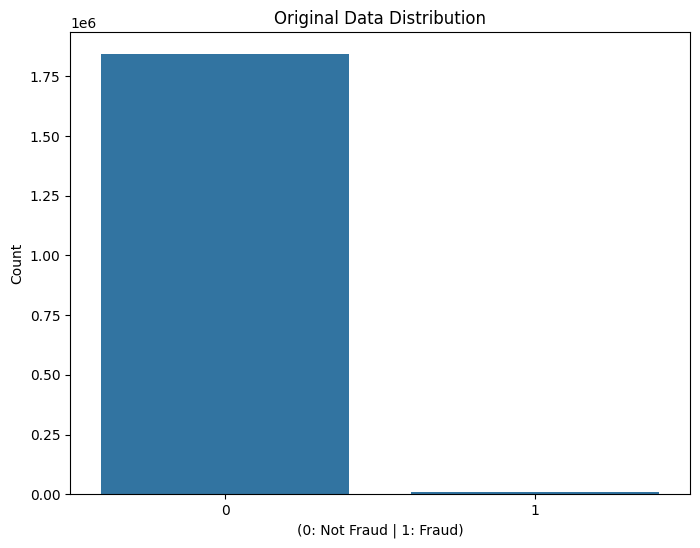

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=pd.concat([train_data, test_data], ignore_index=True))
plt.title('Original Data Distribution')
plt.xlabel('(0: Not Fraud | 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Cleaning Data

In [15]:
train_data.isnull().sum(),test_data.isnull().sum()

(trans_date_trans_time    0
 amt                      0
 gender                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 trans_date_trans_time    0
 amt                      0
 gender                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64)

In [14]:
cols_to_drop = ['Unnamed: 0','cc_num','merchant','first','last','trans_num','unix_time','street','category']
train_data.drop(columns=cols_to_drop,inplace = True)
test_data.drop(columns=cols_to_drop,inplace = True)

### Distance Features

In [16]:
train_data['lat_dist'] = abs(round(train_data['merch_lat'] - train_data['lat'], 2))
train_data['long_dist'] = abs(round(train_data['merch_long'] - train_data['long'], 2))
test_data['lat_dist'] = abs(round(test_data['merch_lat'] - test_data['lat'], 2))
test_data['long_dist'] = abs(round(test_data['merch_long'] - test_data['long'], 2))

In [17]:
cols_to_drop = ['trans_date_trans_time','city','lat','long',
                'job','dob','merch_lat','merch_long','state']
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

### Encoding Gender

In [18]:
train_data.gender = [1 if value == "M" else 0 for value in train_data.gender]
test_data.gender = [1 if value == "M" else 0 for value in test_data.gender]

## Balancing Data

In [19]:
data = pd.concat([train_data, test_data], ignore_index=True)

In [20]:
fraud = data[data['is_fraud'] == 1]
not_fraud = data[data['is_fraud'] == 0].sample(len(fraud), random_state=42)
balanced_data = pd.concat([fraud, not_fraud])

In [22]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = balanced_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    balanced_data[col] = label_encoder.fit_transform(balanced_data[col])

# Scaling Features

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = balanced_data.select_dtypes(include=[np.number]).columns.drop('is_fraud')
balanced_data[numeric_columns] = scaler.fit_transform(balanced_data[numeric_columns])

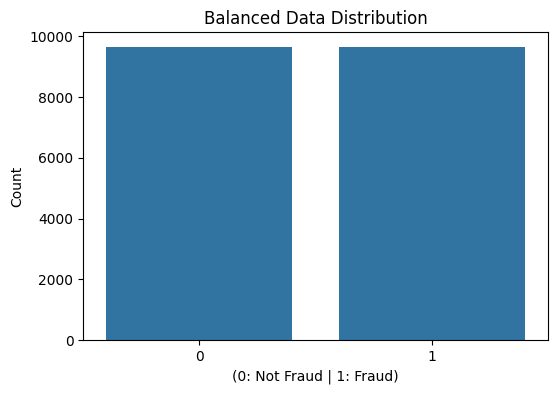

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=balanced_data)
plt.title('Balanced Data Distribution')
plt.xlabel('(0: Not Fraud | 1: Fraud)')
plt.ylabel('Count')
plt.show()

# Splitting Data

In [26]:
from sklearn.model_selection import train_test_split
X = balanced_data.drop('is_fraud', axis=1)
y = balanced_data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Models**

## 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.855995855995856


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1932
           1       0.94      0.76      0.84      1929

    accuracy                           0.86      3861
   macro avg       0.87      0.86      0.85      3861
weighted avg       0.87      0.86      0.85      3861



# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(random_state=45)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.8565138565138565


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1932
           1       0.85      0.86      0.86      1929

    accuracy                           0.86      3861
   macro avg       0.86      0.86      0.86      3861
weighted avg       0.86      0.86      0.86      3861



# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.8917378917378918


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1932
           1       0.91      0.87      0.89      1929

    accuracy                           0.89      3861
   macro avg       0.89      0.89      0.89      3861
weighted avg       0.89      0.89      0.89      3861



# **Comparing the Models**

In [36]:
import pandas as pd
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, lr.predict(X_test)), accuracy_score(y_test, dtc.predict(X_test)), accuracy_score(y_test, rfc.predict(X_test))],
    'Precision': [metrics.precision_score(y_test, lr.predict(X_test)), metrics.precision_score(y_test, dtc.predict(X_test)), metrics.precision_score(y_test, rfc.predict(X_test))],
    'Recall': [metrics.recall_score(y_test, lr.predict(X_test)), metrics.recall_score(y_test, dtc.predict(X_test)), metrics.recall_score(y_test, rfc.predict(X_test))],
    'F1-Score': [metrics.f1_score(y_test, lr.predict(X_test)), metrics.f1_score(y_test, dtc.predict(X_test)), metrics.f1_score(y_test, rfc.predict(X_test))]
})
print(results)

                      Model  Accuracy  Precision    Recall  F1-Score
0       Logistic Regression  0.855996   0.943762  0.756869  0.840046
1  Decision Tree Classifier  0.856514   0.853834  0.860031  0.856921
2             Random Forest  0.891738   0.908158  0.871436  0.889418


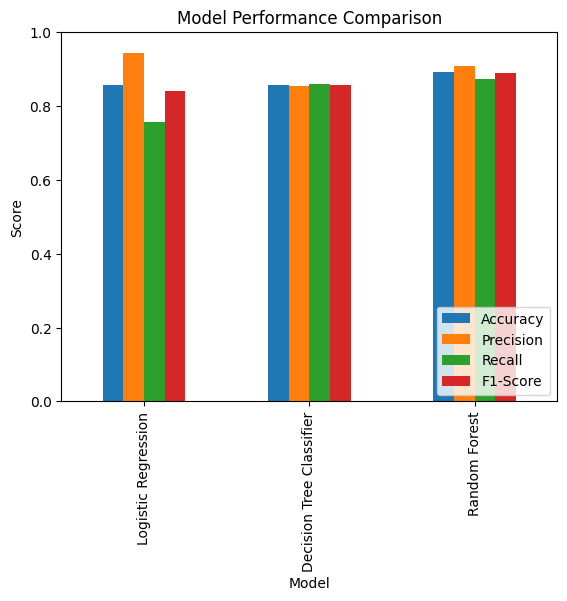

In [38]:
import matplotlib.pyplot as plt

results.plot(x="Model", y=["Accuracy", "Precision", "Recall", "F1-Score"], kind="bar")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()